Tutorial 07

1. For this, you'll need your results from Tutorial 4 which was on plotting. 
If you got your results correct, you should see a monotonically increasing function. 
According to General Relativity, we know that the frequency--time relationship is a power law. 
It is given by:


$f_{\mathrm{GW}}^{-\frac{8}{3}}(t)
= \frac{(8\pi)^{8/3}}{5}
\left( \frac{G \mathcal{M}}{c^3} \right)^{5/3}
(t_c - t)$

where $f_{\mathrm{GW}}$ is the frequency of Gravitational Waves, 
$\mathcal M$ is the chirp mass of the binary system, 
and $t_c$ is the time of coalescence (the time associated with $t=0$ in your data). 

Note that this equation is valid only for $t < t_c$, since after coalescence the waveform enters the ringdown phase where the process is highly non-linear and the frequency evolution can no longer be described by this simple power law.

Your task is to take points with frequency higher than 50 Hz until $t_c$ and fit a curve to get the chirp mass of the system.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv("data_tutorial_07.csv")
raw_data

,Time (s),Frequency(Hz)
0,-0.173779,27.458544
1,-0.172315,27.458544
2,-0.170361,27.458544
3,-0.168164,27.458544
4,-0.166699,30.767304
5,-0.162061,30.767304
6,-0.161084,30.767304
7,-0.158643,30.767304
8,-0.156201,30.767304
9,-0.153760,30.767304


In [5]:
data = raw_data[(raw_data["Time (s)"] < 0) & (raw_data["Frequency(Hz)"] >= 50)]
data

,Time (s),Frequency(Hz)
34,-0.036328,50.922966
35,-0.027051,74.006041
36,-0.020947,84.282605
37,-0.012647,95.209285
38,-0.007520,95.209285
39,-0.003613,138.367082
40,-0.000195,157.580893


In [6]:
xdata = np.log(np.abs(data["Time (s)"]))
ydata = np.log(data["Frequency(Hz)"])

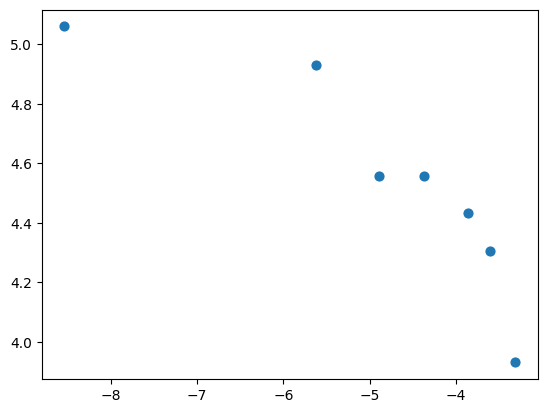

In [7]:
plt.scatter(xdata,ydata,s=40)

In [8]:
def linear(x,m,c):
    return m*x + c


In [9]:
p_opt, p_cov = cf(linear,xdata,ydata)
# p_opt is the array that contains optimized values of the parameters, whereas p_cov is the covariance matrix.
p_opt

array([-0.18372053,  3.6406611 ])

[-0.18372053  3.6406611 ]


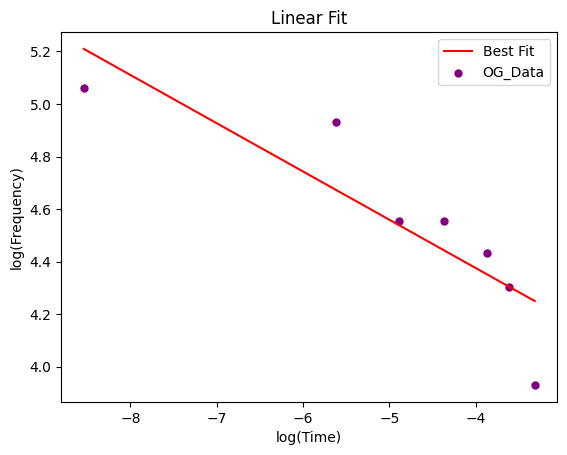

In [10]:
plt.plot(xdata,linear(xdata,*p_opt),label='Best Fit',color='r')
# * before a separable object unpacks it. So you don't need to write lin_func(xdata,p_opt[0],p_opt[1]). The *
# does it for you.
plt.scatter(xdata,ydata,label='OG_Data',s=25,color='purple')
# Yes, you can have scatter plot and a normal plot in one
plt.xlabel('log(Time)')
plt.ylabel('log(Frequency)')
plt.title('Linear Fit')
plt.legend()
print(p_opt)

---------------------------------------------------------------------------------------------------------------------------

2. You'll need to recall what you did in Tutorial 5 which was on astropy. You were asked to plot a histogram based on the number of background counts. You should notice a very nice distribution, except maybe a few irregular peaks. The peaks don't have any astrophysical significance, but are most probably present because of some property of the CCD camera used to capture the image. So, for now we'll ignore them.

Here we are counting the number of photons incident on each pixel. The pixels where you don't see any stars should have photon count to be zero. But that is not true. There is always some background radiation.

Now here we are counting something, in this case, photons. And whenever you are counting something, it is bound to follow Poisson distribution. Let it be no. of radioactive decays in a radioactive material, no. of patients coming into a hospital between 10 to 11 pm, or the number of laser photons hitting a mirror (uncertainity in this leads to what is known as shot noise), they all follow poisson distribution. The background photon count is no different.

Now in the limit that we have infinite data, the poisson distribution becomes continuous, and in this limit the probability distribution is the Gaussian distribution. In fact, the probability distribution of the mean of a random variable always converges to a gaussian. This is the Central Limit Theorem.

Enough about the probability theory, let's get to your task. Your task is to fit a Gaussian Function. If you want your data to resemble a probability distribution, you can just normalize it and then fit a Normal probability distribution function instead of just a Gaussian Function.

In [56]:
bkg_count_data = pd.read_csv("data_tutorial_07_part2.csv")
print(bkg_count_data["Bins"].mean())
print(bkg_count_data["Bins"].std())
print(bkg_count_data["Bins"].max())

522.9460032358893
44.88875137492688
599.9460032358893


In [26]:
xdata = bkg_count_data["Bins"]
ydata = bkg_count_data["Number of Pixels"]

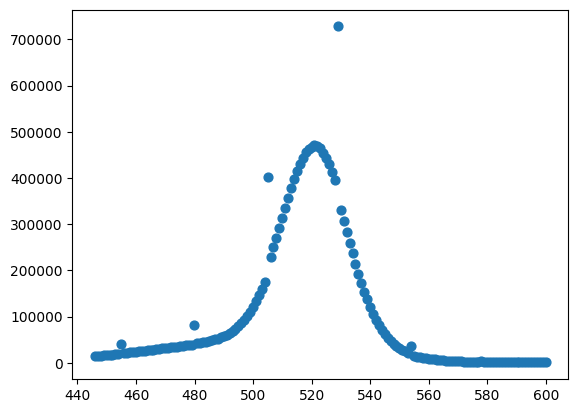

In [28]:
plt.scatter(xdata,ydata,s=40)

In [51]:
def gaussian(xdata, a, mu, sigma):
    return a*np.exp(-1*((xdata-mu)**2)/(sigma**2))

In [59]:
p_opt, p_cov = cf(gaussian,xdata,ydata,(599.95, 522.94, 44.88))
p_opt

array([4.71921382e+05, 5.20381621e+02, 1.79385115e+01])

[4.71921382e+05 5.20381621e+02 1.79385115e+01]


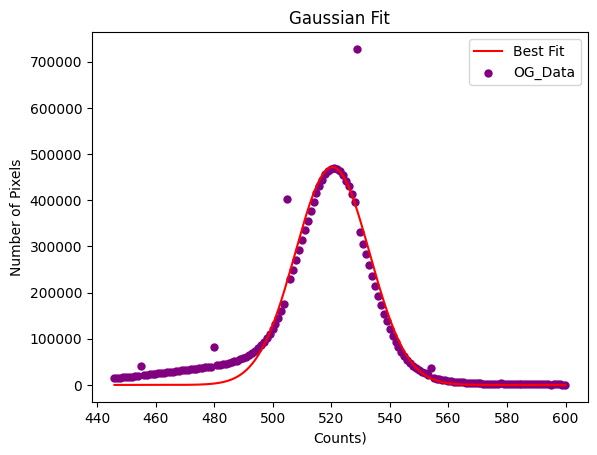

In [60]:
plt.plot(xdata,gaussian(xdata,*p_opt),label='Best Fit',color='r')
plt.scatter(xdata,ydata,label='OG_Data',s=25,color='purple')
plt.xlabel('Counts)')
plt.ylabel('Number of Pixels')
plt.title('Gaussian Fit')
plt.legend()
print(p_opt)